Регресионный анализ. Применим линейную, полиномиальную (степени меньшей либо равной 5) и экспоненциальную регрессию на приведенных данных, а далее выберем наиболее оптимальную модель.

In [227]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer

Сгенерируем некоторый набор данных

In [193]:
start = 0.1
stop = 10
dots = 100

def some_func(x, a, b):
    return a * np.exp(x) + b

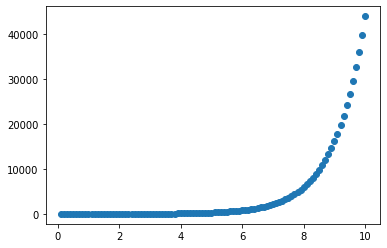

In [194]:
X = np.linspace(start, stop, dots)
y = some_func(X, 2, 4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
plt.scatter(X, y)
plt.show()

Линейная регрессия

In [212]:
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
lin_reg = LinearRegression()
lin_reg = lin_reg.fit(X_train, y_train)
y_1 = lin_reg.predict(X)
lin_reg_r2 = r2_score(y, lin_reg.predict(X))

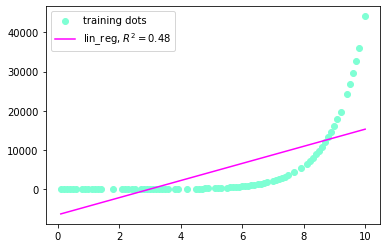

In [213]:
plt.scatter(X_train, y_train, label='training dots', color='aquamarine')
plt.plot(X, y_1,
         label='lin_reg, $R^2={:.2f}$'.format(lin_reg_r2),
         color='magenta')
plt.legend(loc='upper left')
plt.show()

Аналогичным образом проделаем те же операции с оставшимися моделями

Полиномиальная ст. 2

In [216]:
lin_reg_2 = PolynomialFeatures(degree=2)
X_2 = lin_reg_2.fit_transform(X)
X_2_train = lin_reg_2.fit_transform(X_train)
lin_reg = lin_reg.fit(X_2_train, y_train)
y_2 = lin_reg.predict(lin_reg_2.fit_transform(X))
lin_reg_2_r2 = r2_score(y, lin_reg.predict(X_2))

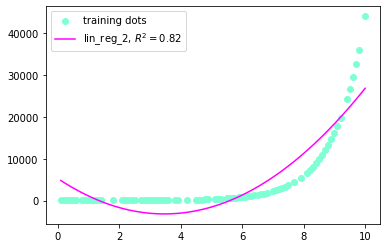

In [221]:
plt.scatter(X_train, y_train, label='training dots', color='aquamarine')
plt.plot(X, y_2,
         label='lin_reg_2, $R^2={:.2f}$'.format(lin_reg_2_r2),
         color='magenta')
plt.legend(loc='upper left')
plt.show()

Полиномиальная ст. 3

In [219]:
lin_reg_3 = PolynomialFeatures(degree=3)
X_3 = lin_reg_3.fit_transform(X)
X_3_train = lin_reg_3.fit_transform(X_train)
lin_reg = lin_reg.fit(X_3_train, y_train)
y_3 = lin_reg.predict(lin_reg_3.fit_transform(X))
lin_reg_3_r2 = r2_score(y, lin_reg.predict(X_3))

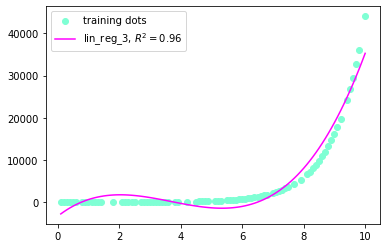

In [222]:
plt.scatter(X_train, y_train, label='training dots', color='aquamarine')
plt.plot(X, y_3,
         label='lin_reg_3, $R^2={:.2f}$'.format(lin_reg_3_r2),
         color='magenta')
plt.legend(loc='upper left')
plt.show()

Полиномиальная ст. 4

In [223]:
lin_reg_4 = PolynomialFeatures(degree=4)
X_4 = lin_reg_4.fit_transform(X)
X_4_train = lin_reg_4.fit_transform(X_train)
lin_reg = lin_reg.fit(X_4_train, y_train)
y_4 = lin_reg.predict(lin_reg_4.fit_transform(X))
lin_reg_4_r2 = r2_score(y, lin_reg.predict(X_4))

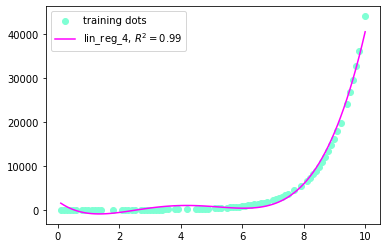

In [224]:
plt.scatter(X_train, y_train, label='training dots', color='aquamarine')
plt.plot(X, y_4,
         label='lin_reg_4, $R^2={:.2f}$'.format(lin_reg_4_r2),
         color='magenta')
plt.legend(loc='upper left')
plt.show()

Полиномильная ст. 5

In [210]:
lin_reg_5 = PolynomialFeatures(degree=5)
X_5 = lin_reg_5.fit_transform(X)
X_5_train = lin_reg_5.fit_transform(X_train)
lin_reg = lin_reg.fit(X_5_train, y_train)
y_5 = lin_reg.predict(lin_reg_5.fit_transform(X))
lin_reg_5_r2 = r2_score(y, lin_reg.predict(X_5))

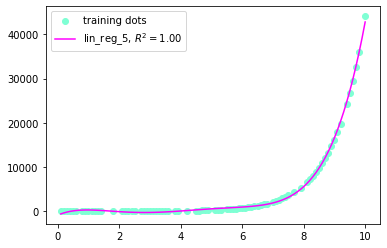

In [225]:
plt.scatter(X_train, y_train, label='training dots', color='aquamarine')
plt.plot(X, y_5,
         label='lin_reg_5, $R^2={:.2f}$'.format(lin_reg_5_r2),
         color='magenta')
plt.legend(loc='upper left')
plt.show()

Экспоненциальная регрессия

In [229]:
exp_reg = LinearRegression()
trans = FunctionTransformer(np.log, validate=True)
y_e = trans.fit_transform(y)
exp_reg = exp_reg.fit(X, y_e)
y_exp = exp_reg.predict(X)
exp_r2 = r2_score(y, np.exp(exp_reg.predict(X)))

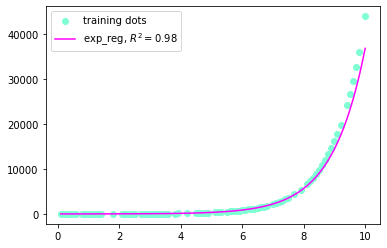

In [232]:
plt.scatter(X_train, y_train, label='training dots', color='aquamarine')
plt.plot(X, np.exp(y_exp),
         label='exp_reg, $R^2={:.2f}$'.format(exp_r2),
         color='magenta')
plt.legend(loc='upper left')
plt.show()

Вывод

На сгенерированных данных наилучшим образом сработала полиномиальная регрессия степени 5, показав коэффицент детерминации 1.00, однако стоит заметить, что хороший результат достигается уже и при 3 степени в 0.96. Экспоненциальная регрессия так же оказалось хороша (0.98), что очевидно ввиду функции, использованной для генерации данных.